In [22]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

main = "FC(F)(F)C12CCC(CC2)CN1"
main_mol = Chem.MolFromSmiles(main)
functional_group = Chem.MolFromSmarts("[CF3]")

print(main_mol.HasSubstructMatch(functional_group))
print(main_mol.GetSubstructMatches(functional_group))

False
()


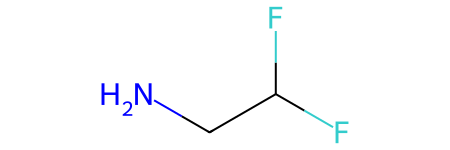

In [26]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
erythromycin = Chem.MolFromSmiles("NCC([H])(F)F")
erythromycin

In [9]:
macro = Chem.MolFromSmarts("CF3")
print(erythromycin.GetSubstructMatches(macro))

[16:53:44] SMILES Parse Error: unclosed ring for input: 'CF3'


ArgumentError: Python argument types in
    Mol.GetSubstructMatches(Mol, NoneType)
did not match C++ signature:
    GetSubstructMatches(class RDKit::ROMol self, class RDKit::MolBundle query, struct RDKit::SubstructMatchParameters params)
    GetSubstructMatches(class RDKit::ROMol self, class RDKit::ROMol query, struct RDKit::SubstructMatchParameters params)
    GetSubstructMatches(class RDKit::ROMol self, class RDKit::MolBundle query, bool uniquify=True, bool useChirality=False, bool useQueryQueryMatches=False, unsigned int maxMatches=1000)
    GetSubstructMatches(class RDKit::ROMol self, class RDKit::ROMol query, bool uniquify=True, bool useChirality=False, bool useQueryQueryMatches=False, unsigned int maxMatches=1000)

In [15]:
from rdkit import Chem

# Define a SMILES string with a molecule
original_smiles = "FC(F)(F)C1CCCCN1"  # Example: isobutyl acetate

# Create an RDKit molecule object
original_molecule = Chem.MolFromSmiles(original_smiles)

# Define a SMILES string with a substructure to subtract
substructure_smiles = "C(F)(F)F"  # Example: isopropyl group

# Create an RDKit molecule object for the substructure
substructure = Chem.MolFromSmiles(substructure_smiles)

# Subtract the substructure from the original molecule
result_molecule = Chem.DeleteSubstructs(original_molecule, substructure)

# Convert the result molecule to SMILES
result_smiles = Chem.MolToSmiles(result_molecule)

# Print the result
print("Original SMILES:", original_smiles)
print("Substructure SMILES:", substructure_smiles)
print("Result SMILES after subtraction:", result_smiles)


Original SMILES: FC(F)(F)C1CCCCN1
Substructure SMILES: C(F)(F)F
Result SMILES after subtraction: C1CCNCC1


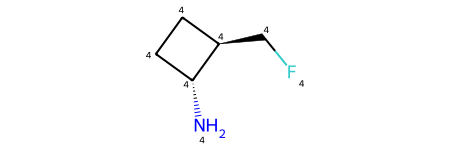

In [41]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

def show_atom_number(mol, label):
    for atom in mol.GetAtoms():
        atom.SetProp("atomNote", "4")
    return mol

mol = Chem.MolFromSmiles('N[C@@H]1CC[C@H]1C([H])([H])F')
subgroup = "CF3"
show_atom_number(mol, 'molAtomMapNumber')

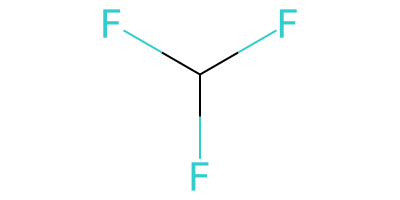

In [10]:
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors, rdqueries

m = Chem.MolFromSmiles('C(F)(F)F')
Draw.MolToImage(m, size=(400,200))

In [14]:
print('Aromatic ring count =', Descriptors.NumAromaticRings(m))

print('Non-aromatic ring count =', Descriptors.NumAliphaticRings(m))

fg = Chem.MolFromSmarts('C(=O)[NX3;H2]') # SMARTS for -CONH2
print('Functional group:', len(m.GetSubstructMatches(fg)), '-CONH2')

Aromatic ring count = 0
Non-aromatic ring count = 0
Functional group: 0 -CONH2


In [13]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdAbbreviations

# See available abbreviations and their SMILES
# where * is the dummy atom that the group would attach to
abbrevs = rdAbbreviations.GetDefaultAbbreviations()
labels = ["Abbrev", "SMILES"]
line = '--------'

print(f"{labels[0]:<10} {labels[1]}")
print(f"{line:<10} {line}")
for a in abbrevs:
   print(f"{a.label:<10} {Chem.MolToSmiles(a.mol)}")

Abbrev     SMILES
--------   --------
CO2Et      *C(=O)OCC
COOEt      *C(=O)OCC
OiBu       *OCC(C)C
nDec       *CCCCCCCCCC
nNon       *CCCCCCCCC
nOct       *CCCCCCCC
nHept      *CCCCCCC
nHex       *CCCCCC
nPent      *CCCCC
iPent      *C(C)CCC
tBu        *C(C)(C)C
iBu        *C(C)CC
nBu        *CCCC
iPr        *C(C)C
nPr        *CCC
Et         *CC
NCF3       *NC(F)(F)F
CF3        *C(F)(F)F
CCl3       *C(Cl)(Cl)Cl
CN         *C#N
NC         *[N+]#[C-]
N(OH)CH3   *N(C)[OH]
NO2        *[N+](=O)[O-]
NO         *N=O
SO3H       *S(=O)(=O)[OH]
CO2H       *C(=O)[OH]
COOH       *C(=O)[OH]
OEt        *OCC
OAc        *OC(C)=O
NHAc       *NC(C)=O
Ac         *C(C)=O
CHO        *C=O
NMe        *NC
SMe        *SC
OMe        *OC
CO2-       *C(=O)[O-]
COO-       *C(=O)[O-]


((1, 0, 2, 3),)


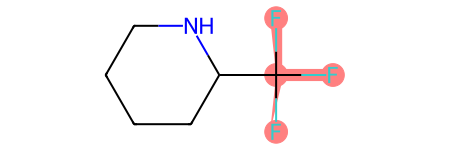

In [31]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

m = Chem.MolFromSmiles('FC(F)(F)C1CCCCN1')
substructure = Chem.MolFromSmarts('C(F)(F)F')
print(m.GetSubstructMatches(substructure))

m

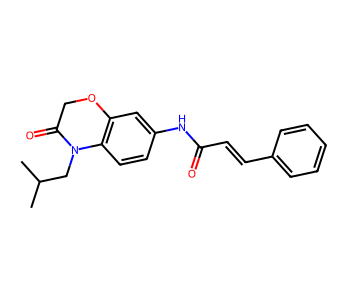

In [30]:
from rdkit import Chem
from rdkit.Chem.Draw import rdMolDraw2D
import io
from PIL import Image

mol = Chem.MolFromSmiles('CC(C)CN1C(=O)COC2=C1C=CC(=C2)NC(=O)/C=C/C3=CC=CC=C3')
rgba_color = (1.0, 1.0, 1.0, 0.1) # transparent blue

atoms = []
for a in mol.GetAtoms():
    atoms.append(a.GetIdx())

bonds = []
for bond in mol.GetBonds():
    aid1 = atoms[bond.GetBeginAtomIdx()]
    aid2 = atoms[bond.GetEndAtomIdx()]
    bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())

drawer = rdMolDraw2D.MolDraw2DCairo(350,300)
drawer.drawOptions().fillHighlights=True
drawer.drawOptions().setHighlightColour((rgba_color))
drawer.drawOptions().highlightBondWidthMultiplier=20
drawer.drawOptions().clearBackground = False
# rdMolDraw2D.PrepareAndDrawMolecule(drawer, mol, highlightAtoms=atoms)
rdMolDraw2D.PrepareAndDrawMolecule(drawer, mol, highlightBonds=bonds)
bio = io.BytesIO(drawer.GetDrawingText())
Image.open(bio)

In [51]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdmolfiles, rdmolops

m = Chem.MolFromSmiles('FC(F)(F)C1CCCCN1')

for atom in m.GetAtoms():
    # Get atom information (atom index, symbol, etc.)
    atom_index = atom.GetIdx()
    atom_symbol = atom.GetSymbol()
    print(f"Atom Index: {atom_index}, Atom Symbol: {atom_symbol}")

new_order = rdmolfiles.CanonicalRankAtoms(m)
m = rdmolops.RenumberAtoms(m, new_order)
print(len(m.GetAtoms()))

for atom in m.GetAtoms():
    # Get atom information (atom index, symbol, etc.)
    atom_index = atom.GetIdx()
    atom_symbol = atom.GetSymbol()
    print(f"Atom Index: {atom_index}, Atom Symbol: {atom_symbol}")

for order in new_order:
    print(order)
    

Atom Index: 0, Atom Symbol: F
Atom Index: 1, Atom Symbol: C
Atom Index: 2, Atom Symbol: F
Atom Index: 3, Atom Symbol: F
Atom Index: 4, Atom Symbol: C
Atom Index: 5, Atom Symbol: C
Atom Index: 6, Atom Symbol: C
Atom Index: 7, Atom Symbol: C
Atom Index: 8, Atom Symbol: C
Atom Index: 9, Atom Symbol: N
10
Atom Index: 0, Atom Symbol: F
Atom Index: 1, Atom Symbol: N
Atom Index: 2, Atom Symbol: C
Atom Index: 3, Atom Symbol: F
Atom Index: 4, Atom Symbol: C
Atom Index: 5, Atom Symbol: C
Atom Index: 6, Atom Symbol: C
Atom Index: 7, Atom Symbol: F
Atom Index: 8, Atom Symbol: C
Atom Index: 9, Atom Symbol: C
0
9
1
2
8
6
4
3
5
7


In [47]:
for order in new_order:
    print(order)

0
9
1
2
8
6
4
3
5
7


(2, 0, 3, 7)


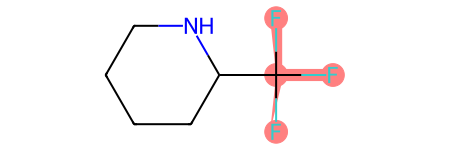

In [71]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

m = Chem.MolFromSmiles('FC(F)(F)C1CCCCN1')
substructure = Chem.MolFromSmiles('C(F)(F)F')

new_order = rdmolfiles.CanonicalRankAtoms(m)
m = rdmolops.RenumberAtoms(m, new_order)

print(m.GetSubstructMatches(substructure)[0])

m

((3, 4, 5), (8, 9, 7))


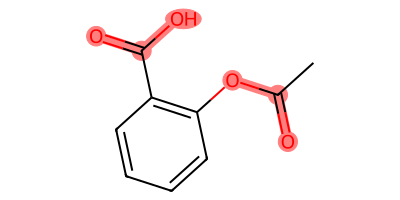

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from copy import deepcopy


def increase_resolution(mol, substructure, size=(400, 200)):
    mol = deepcopy(mol)
    substructure = deepcopy(substructure)
    drawer = rdMolDraw2D.MolDraw2DSVG(size[0], size[1])
    
    # highlightAtoms expects only one tuple, not tuple of tuples. So it needs to be merged into a single tuple
    matches = sum(mol.GetSubstructMatches(substructure), ())
    print(mol.GetSubstructMatches(substructure))
    drawer.DrawMolecule(mol, highlightAtoms=matches)
    
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    
    return svg.replace('svg:','')


mol = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
substructure = Chem.MolFromSmarts('C(=O)O')
display(SVG(increase_resolution(mol, substructure)))

10
1 2


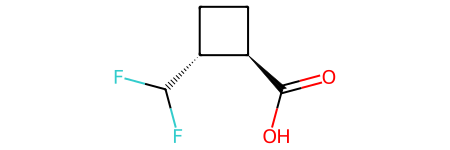

In [26]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

m = Chem.MolFromSmiles('FC(F)([H])[C@@H]1CC[C@H]1C(O)=O')

print(m.GetNumBonds())

print(m.GetBonds()[1].GetBeginAtomIdx(), m.GetBonds()[1].GetEndAtomIdx())

m

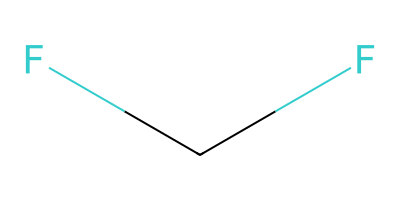

In [25]:
from rdkit import Chem
from rdkit.Chem import Draw

# Приклад SMILES для gem-difluoromethylene group
smiles = 'C(F)F'
m = Chem.MolFromSmiles(smiles)

# Виведення молекули
Draw.MolToImage(m, size=(400, 200))


In [34]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from PIL import Image

# Створюємо об'єкт молекули
mol = Chem.MolFromSmiles('CCO')

# Встановлюємо ваги для атомів та зв'язків
atom_weights = {atom.GetIdx(): atom.GetAtomicNum() for atom in mol.GetAtoms()}
bond_weights = {bond.GetIdx(): bond.GetBondTypeAsDouble() for bond in mol.GetBonds()}

# Призначаємо ваги для атомів
for atom_idx, weight in atom_weights.items():
    mol.GetAtomWithIdx(atom_idx).SetProp('atom_weight', str(weight))

# Призначаємо ваги для зв'язків
for bond_idx, weight in bond_weights.items():
    mol.GetBondWithIdx(bond_idx).SetProp('bond_weight', str(weight))

# Підготовлюємо молекулу для малювання
rdDepictor.Compute2DCoords(mol)

# Створюємо об'єкт для малювання
drawer = rdMolDraw2D.MolDraw2DCairo(400, 200)

# Малюємо молекулу та ваги
drawer.DrawMolecule(mol)

# Виводимо ваги атомів
for atom_idx, weight in atom_weights.items():
    pos = drawer.GetDrawCoords(atom_idx)
    drawer.DrawText(pos, str(weight), (1, 1, 1))

# Виводимо ваги зв'язків
for bond_idx, weight in bond_weights.items():
    bond = mol.GetBondWithIdx(bond_idx)
    pos = drawer.GetBondEndpoints(bond)
    text_pos = ((pos[0][0] + pos[1][0]) / 2, (pos[0][1] + pos[1][1]) / 2)
    drawer.DrawText(text_pos, str(weight), (1, 1, 1))

# Повертаємо зображення
img = drawer.GetDrawingText()
Image.open(img).show()


AttributeError: 'MolDraw2DCairo' object has no attribute 'DrawText'

C 1.237115787690174 -0.25002917166615185 0.0
C -0.060946742296872025 0.5409360264678743 -0.0
O -1.1761690453933018 -0.2909068548017223 -0.0


[16:02:15] Molecule does not have explicit Hs. Consider calling AddHs()


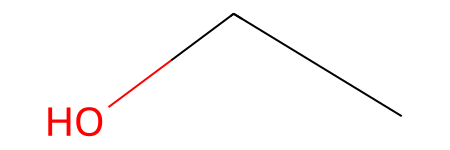

In [46]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Create a molecule from SMILES
smiles = 'CCO'  # replace with your molecule's SMILES
mol = Chem.MolFromSmiles(smiles)

# Generate 3D coordinates
AllChem.EmbedMolecule(mol)

# Get the coordinates of each atom
for i, atom in enumerate(mol.GetAtoms()):
    pos = mol.GetConformer().GetAtomPosition(i)
    print(f'{atom.GetSymbol()} {pos.x} {pos.y} {pos.z}')

mol


C 1.0 2.0 0.0
F -1.1368974458902452 -0.26316716659216544 -0.0
F 1.14179044220366 -0.259715897150144 0.0


[16:45:06] Molecule does not have explicit Hs. Consider calling AddHs()


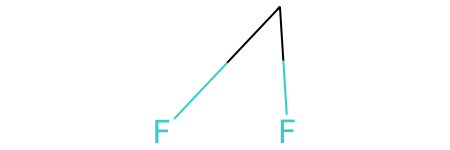

In [51]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Geometry import Point3D

# Створіть молекулу з SMILES
smiles = 'C(F)F'  # замініть на SMILES вашої молекули
mol = Chem.MolFromSmiles(smiles)

# Згенеруйте 3D-координати
AllChem.EmbedMolecule(mol)

# Встановіть нові координати для першого атома
new_pos = Point3D(1.0, 2.0, 0.0)  # замініть на ваші координати
mol.GetConformer().SetAtomPosition(0, new_pos)

# Отримайте координати кожного атома
for i, atom in enumerate(mol.GetAtoms()):
    pos = mol.GetConformer().GetAtomPosition(i)
    print(f'{atom.GetSymbol()} {pos.x} {pos.y} {pos.z}')

mol